<a href="https://colab.research.google.com/github/y001003/Bootcamp/blob/main/Section1_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**전처리**
---
- 판매량 단위 획일화
- 결측치 처리
---



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [3]:
import pandas as pd
import numpy as np

path = '/content/drive/MyDrive/BootCamp/Section1_Project/vgames2.csv'
df = pd.read_csv(path)

df = df.iloc[:,1:]
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03



**- 판매량 단위 획일화**
---



In [4]:
# 전처리_ Sales 값의 단위 통일(M : 삭제, K : /1000)
sales = df.loc[:,'NA_Sales':'Other_Sales']

# M, K 값 포함 index 찾아서 변환
def string_replace_float(x) :
  # find()에서 포함되어있지 않으면 -1값이 나온다.
  # if 값이 -1이 아닌경우 찾는 값이 포함되어 있다는 뜻
  if str(x).find("K") != -1 :
    x = str(x).replace("K",'')
    return float(x) / 1000

  if str(x).find("M") != -1 :
    x = str(x).replace("M",'')
    return float(x)

  return float(x)

sales['NA_Sales'] = sales['NA_Sales'].apply(string_replace_float)
sales['EU_Sales'] = sales['EU_Sales'].apply(string_replace_float)
sales['JP_Sales'] = sales['JP_Sales'].apply(string_replace_float)
sales['Other_Sales'] = sales['Other_Sales'].apply(string_replace_float)

df.loc[:,'NA_Sales':'Other_Sales'] = sales
df.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [5]:
# 전처리_결측값 처리
print("변경 전 결측치 \n",df.isnull().sum())

# Year 결측치는 0 : unkown으로 대체
df['Year'] = df['Year'].fillna(0)
# Genre 결측치는 Misc으로 변경
df['Genre'] = df['Genre'].fillna('Unknown')
# Publisher 결측치는 Unkown으로 대체
df['Publisher'] = df['Publisher'].fillna('Unknown')

print("변경 후 결측치 \n",df.isnull().sum())

변경 전 결측치 
 Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64
변경 후 결측치 
 Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64


**- 결측치 처리**
---



In [6]:
# 결측치 변경 타당성 검토
sum = df.loc[:,'NA_Sales':'Other_Sales'].sum()

# Year에 대하여
year_0 = df.loc[:,'NA_Sales':'Other_Sales'].loc[df['Year'] == 0].sum()
print("Year 0이 차지하는 정도 \n",year_0 / sum)
print("연도별 트렌드의 흐름을 파악하는데 있어서 크리티컬한 볼륨을 가진 데이터가 아니다")
print("약 1%정도의 데이터를 가지고 트렌드가 변화가 아주 유의미하다고 보기 힘들다.\n")

# Genre에 대하여
Unknown_g = df.loc[:,'NA_Sales':'Other_Sales'].loc[df['Genre'] == 'Unknown'].sum()
print("Unknown 이 차지하는 정도 \n", Unknown_g / sum)
print("지역별 가장 선호하는 장르를 파악하는 데이터 분석에 있어서 크리티컬한 볼륨을 가진 데이터가 아니다.\n")

# Publisher에 대하여
Unknown_p = df.loc[:,'NA_Sales':'Other_Sales'].loc[df['Publisher'] == 'Unknown'].sum()
print("Unknown 이 차지하는 정도 \n", Unknown_p / sum)
print("데이터 분석에 있어서 크리티컬한 볼륨을 가진 데이터가 아니다.\n")

Year 0이 차지하는 정도 
 NA_Sales       0.013563
EU_Sales       0.010291
JP_Sales       0.005360
Other_Sales    0.010968
dtype: float64
연도별 트렌드의 흐름을 파악하는데 있어서 크리티컬한 볼륨을 가진 데이터가 아니다
약 1%정도의 데이터를 가지고 트렌드가 변화가 아주 유의미하다고 보기 힘들다.

Unknown 이 차지하는 정도 
 NA_Sales       0.004692
EU_Sales       0.005390
JP_Sales       0.009977
Other_Sales    0.006945
dtype: float64
지역별 가장 선호하는 장르를 파악하는 데이터 분석에 있어서 크리티컬한 볼륨을 가진 데이터가 아니다.

Unknown 이 차지하는 정도 
 NA_Sales       0.006153
EU_Sales       0.005016
JP_Sales       0.005414
Other_Sales    0.003949
dtype: float64
데이터 분석에 있어서 크리티컬한 볼륨을 가진 데이터가 아니다.



---
문제
1. 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.

2. 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.

3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.
---




**1. 지역에 따라서 선호하는 게임 장르가 다를까**
---



In [7]:
grouped_genre = df.loc[:,'NA_Sales':'Other_Sales'].groupby(df['Genre']).sum()
grouped_genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,874.81,522.16,157.90,186.45
Adventure,105.66,64.05,51.95,16.81
Fighting,223.20,101.22,87.34,36.64
Misc,408.05,212.36,105.27,74.04
Platform,446.44,201.61,130.65,51.53
Puzzle,123.35,50.73,56.87,12.52
Racing,357.19,237.10,56.40,77.10
Role-Playing,319.54,183.58,344.95,56.96
Shooter,581.92,313.05,38.28,102.65


In [8]:
# 각 지역의 장르별 Top5 나타내기
NA_top = grouped_genre['NA_Sales'].sort_values(ascending=False,inplace=False)
NA_index = NA_top.index
NA_top.reset_index(drop=True,inplace=True)# region_top_data 를 위해 top 수치데이들을 합칠 때, 서로다른 index로 인해 꼬임 방지

EU_top = grouped_genre['EU_Sales'].sort_values(ascending=False,inplace=False)
EU_index = EU_top.index
EU_top.reset_index(drop=True,inplace=True)

JP_top = grouped_genre['JP_Sales'].sort_values(ascending=False,inplace=False)
JP_index = JP_top.index
JP_top.reset_index(drop=True,inplace=True)

Other_top = grouped_genre['Other_Sales'].sort_values(ascending=False,inplace=False)
Other_index = Other_top.index
Other_top.reset_index(drop=True,inplace=True)

region_top = pd.DataFrame(data=[NA_index[0:5],EU_index[0:5],JP_index[0:5],Other_index[0:5]],index=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],columns=['Top1','Top2','Top3','Top4','Top5'])
region_top_data = pd.DataFrame(data=[NA_top[0:5],EU_top[0:5],JP_top[0:5],Other_top[0:5]])

print(region_top)
print(region_top_data)

region_top_data = round(region_top_data)
region_top_data =region_top_data.astype(str)
region_top['Top1'] = region_top['Top1'] +"("+ region_top_data[0].str.rstrip('.0') + "M)"
region_top['Top2'] = region_top['Top2'] +"("+ region_top_data[1].str.rstrip('.0') + "M)"
region_top['Top3'] = region_top['Top3'] +"("+ region_top_data[2].str.rstrip('.0') + "M)"
region_top['Top4'] = region_top['Top4'] +"("+ region_top_data[3].str.rstrip('.0') + "M)"
region_top['Top5'] = region_top['Top5'] +"("+ region_top_data[4].str.rstrip('.0') + "M)"
region_top

                     Top1    Top2     Top3      Top4  Top5
NA_Sales           Action  Sports  Shooter  Platform  Misc
EU_Sales           Action  Sports  Shooter    Racing  Misc
JP_Sales     Role-Playing  Action   Sports  Platform  Misc
Other_Sales        Action  Sports  Shooter    Racing  Misc
                  0       1       2       3       4
NA_Sales     874.81  680.52  581.92  446.44  408.05
EU_Sales     522.16  376.48  313.05  237.10  212.36
JP_Sales     344.95  157.90  135.37  130.65  105.27
Other_Sales  186.45  134.67  102.65   77.10   74.04


,Top1,Top2,Top3,Top4,Top5
NA_Sales,Action(875M),Sports(681M),Shooter(582M),Platform(446M),Misc(408M)
EU_Sales,Action(522M),Sports(376M),Shooter(313M),Racing(237M),Misc(212M)
JP_Sales,Role-Playing(345M),Action(158M),Sports(135M),Platform(131M),Misc(105M)
Other_Sales,Action(186M),Sports(135M),Shooter(103M),Racing(77M),Misc(74M)


In [9]:
from scipy.stats import chi2_contingency

print("지역별로 선호하는 장르를 찾는 것은 통계적으로 유의한가? - 2 sample 카이검정 테스트\n")

chi_result = chi2_contingency(grouped_genre)
print('chi square: {}'.format(chi_result[0]))
print('P-value: {}'.format(chi_result[1]),"\n")

print("P-value 값이 0.05보다 작음으로")
print("게임장르와 지역차이는 서로 관련성이 있을 가능성이 높아 이 데이터분석은 통계적으로 유의미할 것이다.")

장르와 지역은 서로 독립적인가(귀무가설) 카이제곱 검정

chi square: 699.5476276256018
P-value: 6.45728720266605e-124
P-value 값이 0.05보다 작음으로, 신뢰도 95% 수준에서 귀무가설인 장르와 지역은 서로 독립적이라는 가정은 기각 할 수 있다.
즉 게임장르와 지역차이는 서로 관련성이 있을 가능성이 높다


In [10]:
print("미국과 유럽의 판매량 상관관계가 1에 근접할 정도로 매우 높게 나왔으며, 가장 선호하는 장르 Top3가 '액션', '스포츠', '슈팅'순으로 동일했다.")
print("일본은 다른 지역에 비해 롤플레이잉 장르의 선호도가 1순위일 정도로 높았다. 이후 순위는 액션, 스포츠 순으로 다른 지역과 비슷한 경향을 보였다.")
grouped_genre.corr()

미국과 유럽의 판매량 상관관계가 1에 근접할 정도로 매우 높게 나왔으며, 가장 선호하는 장르 Top3가 '액션', '스포츠', '슈팅'순으로 동일했다.
일본은 다른 지역에 비해 롤플레이잉 장르의 선호도가 1순위일 정도로 높았다. 이후 순위는 액션, 스포츠 순으로 다른 지역과 비슷한 경향을 보였다.


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
NA_Sales,1.000000,0.988239,0.362482,0.976224
EU_Sales,0.988239,1.000000,0.354295,0.994021
JP_Sales,0.362482,0.354295,1.000000,0.333167
Other_Sales,0.976224,0.994021,0.333167,1.000000


In [11]:
grouped_genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,874.81,522.16,157.90,186.45
Adventure,105.66,64.05,51.95,16.81
Fighting,223.20,101.22,87.34,36.64
Misc,408.05,212.36,105.27,74.04
Platform,446.44,201.61,130.65,51.53
Puzzle,123.35,50.73,56.87,12.52
Racing,357.19,237.10,56.40,77.10
Role-Playing,319.54,183.58,344.95,56.96
Shooter,581.92,313.05,38.28,102.65


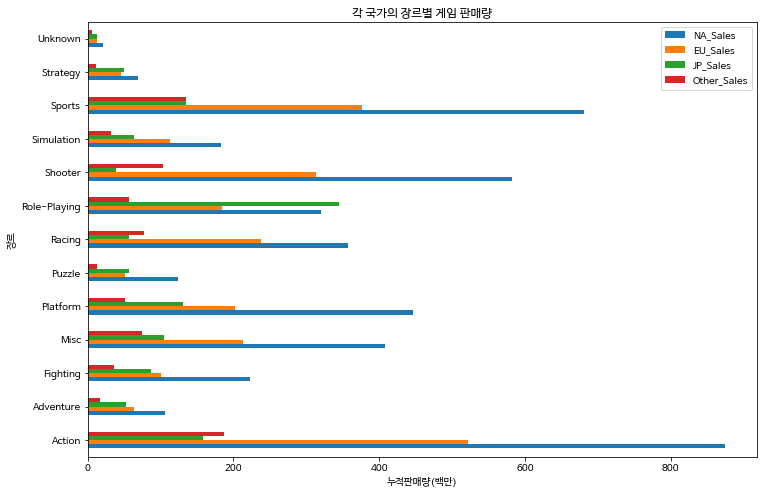

In [12]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

grouped_genre.plot(kind="barh",figsize=(12,8))

plt.title("각 국가의 장르별 게임 판매량")
plt.xlabel("누적판매량(백만)")
plt.ylabel("장르")
plt.show()

**2. 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.**
---


연도별 게임 트렌드는 '연도별 가장 잘 팔린 게임 플랫폼과 게임 장르'를 확인한다.


In [13]:
df['World_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
year_trend = df['World_Sales'].groupby([df['Year']]).sum()

# pd.set_option('display.max_rows', 500)
years = year_trend[year_trend > year_trend.sum() * (1/1000) ] # Year데이터가 정확하게 분류되지 않음으로, 트렌드 계산에 있어서 0.1% 이하 년도 값을 지운다.

# 연도 데이터 10 과 11은 각각 17.91 과 11.52로 0.1%보다 높지만 데이터 효율상 제거한다
years = years[(years.index != 10) & (years.index != 11) & (years.index != 0) ]

df = df[df['Year'].isin(years.index)]

year_trend_p = df['World_Sales'].groupby([df['Year'],df['Platform']]).sum()
year_trend_p_g = df['World_Sales'].groupby([df['Year'],df['Genre']]).sum()


In [14]:
# 연도별 가장 잘 팔린 플랫폼
df_trend_p = pd.DataFrame(year_trend_p)
df_trend_p = pd.pivot_table(df_trend_p,columns='Platform',index='Year',values='World_Sales')

# 연도별 가장 잘 팔린 장르
df_trend_p_g = pd.DataFrame(year_trend_p_g)
df_trend_p_g = pd.pivot_table(df_trend_p_g,columns='Genre',index='Year',values='World_Sales')
# df_trend_p = df_trend_p/df_trend_p.sum(axis=1)
df_trend_p.head()

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980.0,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981.0,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982.0,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983.0,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984.0,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# 최근 20년 연도별 게임 플랫폼의 매출 비율
df_trend_p['sum'] = df_trend_p.sum(axis=1)
for column in df_trend_p.columns:
  df_trend_p[column] = df_trend_p[column]/df_trend_p['sum']
df_trend_p = df_trend_p.iloc[-20:,:-1]

# 최근 20년 연도별 게임 장르별 매출 비율
df_trend_p_g['sum'] = df_trend_p_g.sum(axis=1)
for column in df_trend_p_g.columns:
  df_trend_p_g[column] = df_trend_p_g[column]/df_trend_p_g['sum']
df_trend_p_g = df_trend_p_g.iloc[-20:,:-1]

df_trend_p
df_trend_p['2600'].isin([np.nan])
df_trend_p.dropna(how='all',axis=1,inplace=True)
# df_trend_p.drop(columns=['2600','3DO','GEN','GG','NES','NG','PCFX'])

Text(0, 0.5, '연도')

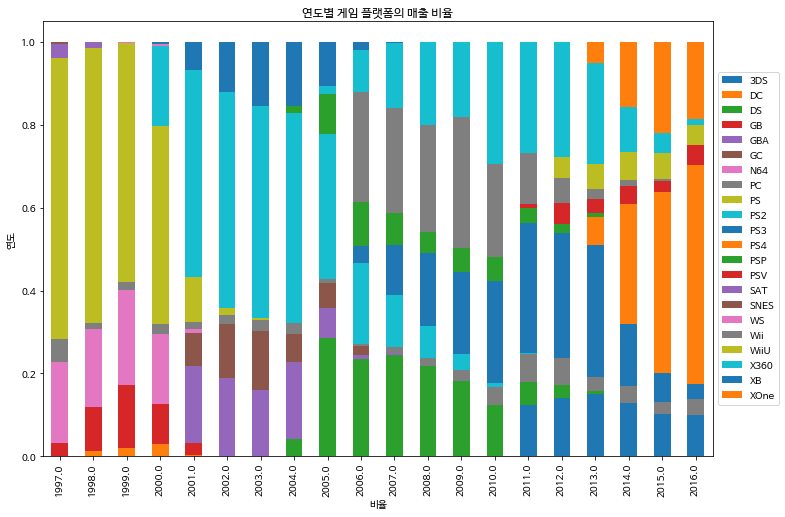

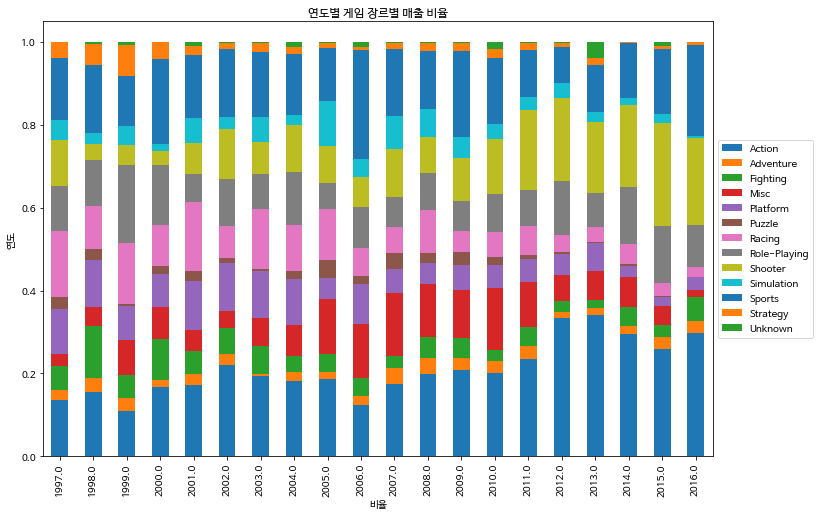

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 6]

# 각 연도별 게임 플랫폼의 매출 비율
df_trend_p.plot.bar(stacked=True,figsize=(12,8)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.title("연도별 게임 플랫폼의 매출 비율")
plt.xlabel("비율")
plt.ylabel("연도")
# 각 연도별 게임 장르별 매출 비율
df_trend_p_g.plot.bar(stacked=True,figsize=(12,8)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.title("연도별 게임 장르별 매출 비율")
plt.xlabel("비율")
plt.ylabel("연도")

**3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스**
---



In [33]:
# 같은 게임인데, 다른 연도에 플랫폼으로 출시된 게임 정리
col = ['Name','NA_Sales','EU_Sales','JP_Sales','Other_Sales','World_Sales']
top_df = df[col].groupby(['Name']).sum().sort_values('World_Sales',ascending=False)

# 게임의 출시년도, 장르, 제작사 데이터
col2 = ['Name','Year','Genre','Publisher']
right_df = df[col2].drop_duplicates(['Name'], keep='first')
merge_df = pd.merge(right_df,top_df,how='inner',on='Name')
# 순위 정리
merge_df = merge_df.sort_values('World_Sales',ascending=False)
merge_df.reset_index(drop=True,inplace=True)
# Top 10 판매량 
merge_df_top10 = merge_df.iloc[:10]
merge_df_top10

,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,World_Sales
0,Wii Sports,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Grand Theft Auto V,2014.0,Action,Take-Two Interactive,23.46,23.04,1.39,8.03,55.92
2,Super Mario Bros.,1985.0,Platform,Nintendo,32.48,4.88,6.96,0.99,45.31
3,Tetris,1989.0,Puzzle,Nintendo,26.17,2.95,6.03,0.69,35.84
4,Mario Kart Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
5,Wii Sports Resort,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
6,Pokemon Red/Pokemon Blue,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
7,Call of Duty: Modern Warfare 3,2011.0,Shooter,Activision,15.58,11.29,0.62,3.35,30.84
8,New Super Mario Bros.,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
9,Call of Duty: Black Ops II,2012.0,Shooter,Activision,14.08,11.05,0.72,3.88,29.73


<BarContainer object of 10 artists>

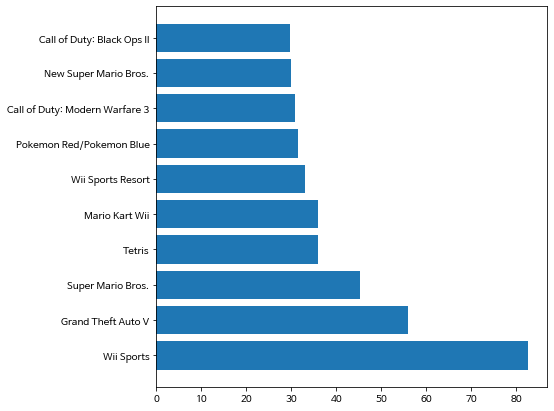

In [37]:
# Top 10 시각화
merge_df_top10 = merge_df.iloc[:10]
plt.figure(figsize=(7,7))
plt.barh(merge_df_top10['Name'],merge_df_top10['World_Sales'])

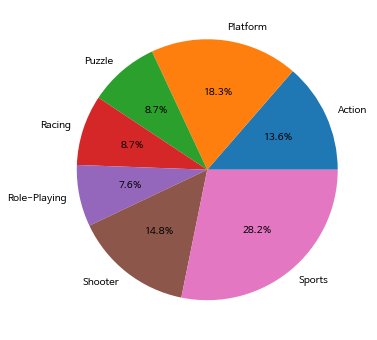

In [45]:
merge_df_top10_genre = merge_df_top10.groupby(merge_df_top10['Genre']).sum()
merge_df_top10_genre['World_Sales']
plt.pie(merge_df_top10_genre['World_Sales'],labels=merge_df_top10_genre.index, autopct='%.1f%%')
plt.show()

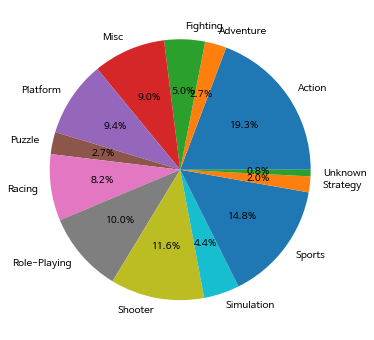

In [39]:
merge_df_genre = merge_df.groupby(merge_df['Genre']).sum()
plt.pie(merge_df_genre['World_Sales'],labels=merge_df_genre.index, autopct='%.1f%%')
plt.show()

**4. 결론**
---

만약 우리 게임회사가 전사적인 노력을 기울여서 반드시 하나의 게임을 개발해야 한다면?

미국과 유럽을 겨냥하여 액션게임을 개발해야한다.\
이유 : 
1. 시장의 크기

2. 시장의 경쟁환경

3. 트랜드 분석

4_1 : 시장의 크기
---
시장의 크기가 가장 크다. 판매량을 비교해보면 미국과 유럽의 장르별 소비경향이 매우 유사한 것으로 보인다.(상관계수 분석)\
즉 장르를 선택할 때 미국과 유럽을 하나의 시장으로 보고 결정해도 무방하다는 것(미국 유럽 시장 합)


In [26]:
grouped_genre['Total_Sales'] = grouped_genre.sum(axis=1)
grouped_genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,
Action,874.81,522.16,157.90,186.45,1741.32
Adventure,105.66,64.05,51.95,16.81,238.47
Fighting,223.20,101.22,87.34,36.64,448.40
Misc,408.05,212.36,105.27,74.04,799.72
Platform,446.44,201.61,130.65,51.53,830.23
Puzzle,123.35,50.73,56.87,12.52,243.47
Racing,357.19,237.10,56.40,77.10,727.79
Role-Playing,319.54,183.58,344.95,56.96,905.03
Shooter,581.92,313.05,38.28,102.65,1035.90


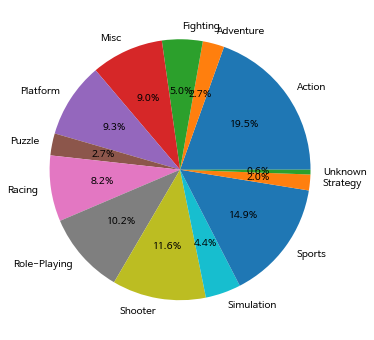

In [41]:
plt.pie(grouped_genre['Total_Sales'],labels=grouped_genre.index, autopct='%.1f%%')
plt.show()

4_2 : 시장의 경쟁환경
---
세계 Top10 판매된 게임 중에 액션게임은 GTA 시리즈 밖에 없으며, 판매량 비중은 불과 13.6%에 불과하다. \
즉 GTA를 제외하고는 압도적인 시장 점유율을 가지고 있는 게임이 없다는 것\
이미 압도적인 포지션을 가진 게임이 많은 다른 장르에 비해, 게임 체인저가 될 수 있는 가능성이 높다. 


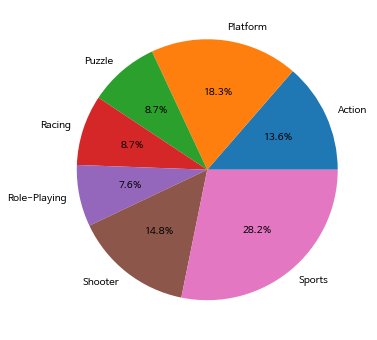

In [47]:
merge_df_top10_genre = merge_df_top10.groupby(merge_df_top10['Genre']).sum()
merge_df_top10_genre['World_Sales']
plt.pie(merge_df_top10_genre['World_Sales'],labels=merge_df_top10_genre.index, autopct='%.1f%%')
plt.show()

4_3 : 최신 트랜드
---
트랜드 분석을 통해 액션게임이 2000년대 게임산업을 지배해왔다는 것을 알 수 있다. 또한 최근들어 슈팅게임의 비중이 커지고 있는것을 확인할수 있는데 만약 액션게임에 슈팅요소를 제대로 추가한 게임을 판매할 경우 성공할 가능성을 더 높힐수 있을 것으로 전망된다.


Text(0, 0.5, '연도')

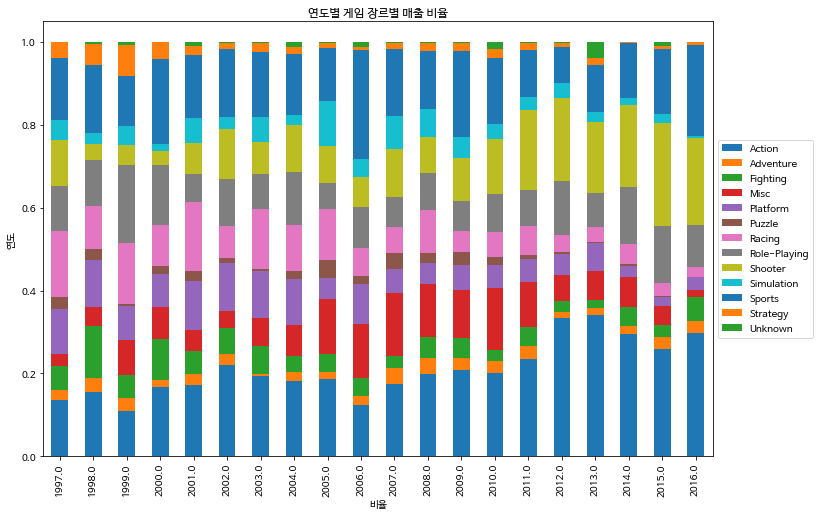

In [28]:
# 각 연도별 게임 장르별 매출 비율
df_trend_p_g.plot.bar(stacked=True,figsize=(12,8)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.title("연도별 게임 장르별 매출 비율")
plt.xlabel("비율")
plt.ylabel("연도")